# Setups 


In [0]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')
remove_ids = [2, 5, 6, 8, 9, 10, 13, 21, 24, 26, 32, 37, 40, 43, 44, 46, 48]
# [1, 4, 11, 12, 18, 39, 52, 25,26,34,40,42,46,50, 43, 44, 45, 47, 48, 49, 51, 52]

pn = 53

In [0]:
less_cubes_participant = np.array([ 3.,  7., 15., 16., 17., 19., 20., 22., 23., 25., 27., 29., 30.,
       31., 33., 34., 35., 36., 38., 41., 42., 45., 47., 50., 51., 52.]).astype(int)

less_cubes_participant

array([ 3,  7, 15, 16, 17, 19, 20, 22, 23, 25, 27, 29, 30, 31, 33, 34, 35,
       36, 38, 41, 42, 45, 47, 50, 51, 52])

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df =  pd.read_csv("/content/drive/My Drive/PHRIExpData/results-survey128918.csv")
pf = pd.DataFrame(columns=["s0a","s0b","s1a","s1b","s2a","s2b","s3a","s3b","s4a","s4b"])

# Hook/link with participant number and cube counts from scene_2
# 

# exp = pd.read_csv("/content/drive/My Drive/PHRIExpData/choices.csv")[1:]

Dropping Biased participants from questionnaire data


In [0]:
print(df.shape[0])
for i in remove_ids:
  df = df.drop(df[df["What is your participant number?"] == i].index)
df = df.reset_index()
# participant 49 put a weird ID
df["What is your participant number?"][42] = 49

53


Dropping irrelevant columns and dividing the rest into sections for pre-questionaire {bfis, risk_propensity, trust_propensity} and post-questionaire {godspeed, ownQ, openQ}.

In [0]:
df = df.drop(columns=['Response ID', 'Date submitted', 'Last page', 'Start language','Date last action'])
bfis = df.loc[ : , [
                      'Do you agree or disagree with the following statements? [Do you worry a lot?]',
                      'Do you agree or disagree with the following statements? [Do you get nervous easily?]',
                      'Do you agree or disagree with the following statements? [Do you remain calm in tense situations?]',
                      'Do you agree or disagree with the following statements? [Are you talkative?]',
                      'Do you agree or disagree with the following statements? [Are you outgoing, sociable?]',
                      'Do you agree or disagree with the following statements? [Are you reserved?]',
                      'Do you agree or disagree with the following statements? [Are you original? / Do you come up with new ideas?]',
                      'Do you agree or disagree with the following statements? [Do you value artistic, aesthetic experiences?]',
                      'Do you agree or disagree with the following statements? [Do you have an active imagination?]',
                      'Do you agree or disagree with the following statements? [Are you sometimes rude to others?]',
                      'Do you agree or disagree with the following statements? [Do you have a forgiving nature?]',
                      'Do you agree or disagree with the following statements? [Are you considerate and kind to almost everyone?]',
                      'Do you agree or disagree with the following statements? [Do you do a thorough job?]',
                      'Do you agree or disagree with the following statements? [Do you tend to be lazy?]',
                      'Do you agree or disagree with the following statements? [Do you do things efficiently?]',
                      ]
                ]
risk_propensity = df.loc[ : , [
                      'Do you agree or disagree with the following statements? [Safety first]', 
                      'Do you agree or disagree with the following statements? [I do not take risks with my health]',
                      'Do you agree or disagree with the following statements? [I prefer to avoid risks]',
                      'Do you agree or disagree with the following statements? [I take risks regularly]',
                      'Do you agree or disagree with the following statements? [I really dislike not knowing what is going to happen]',
                      ]
                  ]
trust_propensity = df.loc[ : , [
                      'Do you agree or disagree with the following statements? [One should be very cautious with strangers.]',
                      'Do you agree or disagree with the following statements? [Most experts tell the truth about the limits of their knowledge.]',
                      'Do you agree or disagree with the following statements? [Most people can be counted on to do what they say they will do.]',
                      'Do you agree or disagree with the following statements? [Most people answer public opinion polls honestly.]',
                      'What is your participant number?'
                      ]
                  ]
# post questionaire
godspeed = df.iloc[:,36:76]
godspeed["id"] = df["What is your participant number?"]
ownQ = df.iloc[:,76:110]
ownQ["id"] = df["What is your participant number?"]
openQ = df.iloc[:,110:113]
openQ["id"] = df["What is your participant number?"]


Dropping participants that were biased

Creating dataframe for participant's cube count data

In [0]:
for i in range(1,pn+1):
  f = pd.read_csv("/content/drive/My Drive/PHRIExpData/participant_"+str(i)+".csv")
  pf = pf.append({ 
      "s0a" : f["robot_a"][0]
      ,"s0b" : f["robot_b"][0]
      ,"s1a" : f["robot_a"][1]
      ,"s1b" : f["robot_b"][1]
      ,"s2a" : f["robot_a"][2]
      ,"s2b" : f["robot_b"][2]
      ,"s3a" : f["robot_a"][3]
      ,"s3b" : f["robot_b"][3]
      ,"s4a" : f["robot_a"][4]
      ,"s4b" : f["robot_b"][4]
      }, ignore_index=True)

A = pf.loc[:, ["s0a","s1a","s2a","s3a","s4a"]]
B = pf.loc[:, ["s0b","s1b","s2b","s3b","s4b"]]
pf["A/B"] = "N"
pf["id"] = 0
for i in range(0,pf.shape[0]):
  pf["id"][i] = i+1
  if ((i%2)==0):
    pf["A/B"][i] = "B" 
  else:
    pf["A/B"][i] = "A"
    pass

print(pf.shape[0])

for i in remove_ids:
  pf = pf.drop(pf[pf["id"] == i].index)

pf = pf.reset_index()


53
36


# Data Preprocessing

## Risk Propensity

Data cleaning and inverting the response of the negative questions. and replacing keys. 

In [0]:
# risk propensity
# paper says 1-4 are inverted, but 1-3 and 5 makes more sense...
inverted_keys = [
                   "Do you agree or disagree with the following statements? [Safety first]",
                   "Do you agree or disagree with the following statements? [I do not take risks with my health]",
                   "Do you agree or disagree with the following statements? [I prefer to avoid risks]",
                   "Do you agree or disagree with the following statements? [I really dislike not knowing what is going to happen]"
]
for key, values in risk_propensity.items():
  print(key)
  if key not in inverted_keys:
    # normal scale
    converted_values = [int(value[1:]) for value in values]
  else:
    # inverted scales
    converted_values = [8-int(value[1:]) for value in values]
  print(converted_values)
  risk_propensity[key] = converted_values
risk_propensity_scores = np.sum(risk_propensity.values, axis=1) / 5.0

Do you agree or disagree with the following statements? [Safety first]
[3, 3, 1, 1, 3, 6, 3, 4, 2, 2, 2, 2, 4, 1, 4, 5, 5, 2, 1, 1, 6, 4, 2, 1, 2, 2, 3, 2, 4, 3, 2, 1, 3, 3, 2, 3]
Do you agree or disagree with the following statements? [I do not take risks with my health]
[5, 1, 1, 2, 3, 5, 2, 2, 3, 2, 4, 5, 1, 2, 5, 3, 5, 2, 3, 1, 6, 3, 1, 2, 3, 2, 4, 2, 6, 3, 3, 2, 3, 3, 3, 3]
Do you agree or disagree with the following statements? [I prefer to avoid risks]
[5, 2, 1, 4, 6, 4, 3, 6, 2, 5, 3, 4, 1, 2, 4, 3, 5, 4, 2, 1, 6, 2, 1, 3, 2, 2, 3, 2, 5, 7, 2, 4, 4, 4, 3, 3]
Do you agree or disagree with the following statements? [I take risks regularly]
[3, 3, 3, 4, 5, 2, 3, 4, 2, 5, 2, 4, 1, 2, 5, 3, 4, 5, 6, 1, 6, 2, 4, 2, 3, 1, 2, 2, 4, 5, 2, 2, 4, 3, 2, 3]
Do you agree or disagree with the following statements? [I really dislike not knowing what is going to happen]
[4, 4, 1, 4, 4, 1, 3, 3, 2, 3, 1, 6, 1, 3, 1, 2, 6, 4, 6, 3, 6, 3, 2, 3, 2, 2, 3, 5, 5, 7, 5, 4, 2, 5, 3, 4]


Risk propensity mean and standard deviation calculations 

Risk propensity mean for each individual participant was calculated and normalized (scale of 1-7)

In [0]:
# graph mean and sd over all participants and then match that to the amount of cubes people have distributed.
# wether or not their propensity to take risks is related to the amount of cubes they gave away
risk_propensity['risk_mean'] = risk_propensity.mean(axis=1)
risk_propensity['risk_mean'] = risk_propensity['risk_mean'] / 7.0

##Trsut Propensity

Trust propensity data (trust questions) keys are replaced. (A1 - A5) For negative questions the responses are inverted, and new column {trust_mean} was added and calculated as average and nomarlized value responses to the trust questions.

In [0]:
trust_propensity.replace(to_replace="A1", value=1, inplace=True)
trust_propensity.replace(to_replace="A2", value=2, inplace=True)
trust_propensity.replace(to_replace="A3", value=3, inplace=True)
trust_propensity.replace(to_replace="A4", value=4, inplace=True)
trust_propensity.replace(to_replace="A5", value=5, inplace=True)
trust_propensity['Do you agree or disagree with the following statements? [One should be very cautious with strangers.]'] = abs(
    6 - trust_propensity['Do you agree or disagree with the following statements? [One should be very cautious with strangers.]'])
trust_propensity['trust_mean'] = trust_propensity.mean(axis=1)
trust_propensity['trust_mean'] = trust_propensity['trust_mean'] / 7.0

In [0]:
trust_propensity.rename(columns={"What is your participant number?": "participant"}, inplace=True)
trust_propensity.head()

,Do you agree or disagree with the following statements? [One should be very cautious with strangers.],Do you agree or disagree with the following statements? [Most experts tell the truth about the limits of their knowledge.],Do you agree or disagree with the following statements? [Most people can be counted on to do what they say they will do.],Do you agree or disagree with the following statements? [Most people answer public opinion polls honestly.],participant,trust_mean
0,2,4,3,2,1,0.342857
1,4,4,4,2,3,0.485714
2,2,3,4,2,4,0.428571
3,4,2,3,3,7,0.542857
4,3,3,3,3,11,0.657143


## BFIS

BFI-S personality questionare keys are replaced. (A1 - A7) For negative questions the responses are inverted. New columns were added and calculated as each category of the bfis questionaire. (averaged and nomalized)

In [0]:
bfis.replace(to_replace="A1", value=1, inplace=True)
bfis.replace(to_replace="A2", value=2, inplace=True)
bfis.replace(to_replace="A3", value=3, inplace=True)
bfis.replace(to_replace="A4", value=4, inplace=True)
bfis.replace(to_replace="A5", value=5, inplace=True)
bfis.replace(to_replace="A6", value=6, inplace=True)
bfis.replace(to_replace="A7", value=7, inplace=True)

bfis['Do you agree or disagree with the following statements? [Do you remain calm in tense situations?]'] = abs(
    8 - bfis['Do you agree or disagree with the following statements? [Do you remain calm in tense situations?]'])

bfis['neurot'] = (bfis['Do you agree or disagree with the following statements? [Do you worry a lot?]'] + 
                   bfis['Do you agree or disagree with the following statements? [Do you get nervous easily?]'] +
                   bfis['Do you agree or disagree with the following statements? [Do you remain calm in tense situations?]'])/3
bfis['neurot'] = bfis['neurot'] #/ 7.0

bfis['Do you agree or disagree with the following statements? [Are you reserved?]'] = abs(
    8 - bfis['Do you agree or disagree with the following statements? [Are you reserved?]'])

bfis['extro'] = (bfis['Do you agree or disagree with the following statements? [Are you talkative?]'] + 
                   bfis['Do you agree or disagree with the following statements? [Are you outgoing, sociable?]'] +
                   bfis['Do you agree or disagree with the following statements? [Are you reserved?]'])/3
bfis['extro'] = bfis['extro'] #/ 7.0

bfis['openn'] = (bfis['Do you agree or disagree with the following statements? [Are you original? / Do you come up with new ideas?]'] + 
                   bfis['Do you agree or disagree with the following statements? [Do you value artistic, aesthetic experiences?]'] +
                   bfis['Do you agree or disagree with the following statements? [Do you have an active imagination?]'])/3
bfis['openn'] = bfis['openn'] #/ 7.0

bfis['Do you agree or disagree with the following statements? [Are you sometimes rude to others?]'] = abs(
    8 - bfis['Do you agree or disagree with the following statements? [Are you sometimes rude to others?]'])

bfis['agree'] = (bfis['Do you agree or disagree with the following statements? [Are you sometimes rude to others?]'] + 
                   bfis['Do you agree or disagree with the following statements? [Do you have a forgiving nature?]'] +
                   bfis['Do you agree or disagree with the following statements? [Are you considerate and kind to almost everyone?]'])/3
bfis['agree'] = bfis['agree'] #/ 7.0

bfis['Do you agree or disagree with the following statements? [Do you tend to be lazy?]'] = abs(
    8 - bfis['Do you agree or disagree with the following statements? [Do you tend to be lazy?]'])

bfis['consc'] = (bfis['Do you agree or disagree with the following statements? [Do you do a thorough job?]'] + 
                   bfis['Do you agree or disagree with the following statements? [Do you tend to be lazy?]'] +
                   bfis['Do you agree or disagree with the following statements? [Do you do things efficiently?]'])/3
bfis['consc'] = bfis['consc'] #/ 7.0


## Godspeed

GODSPEED questionare keys are replaced. (A1 - A9) For negative questions the responses are inverted. New columns were added and calculated as each category of the GODSPEED questionaire for each robot. (averaged and normalized)

In [0]:
godspeed.replace(to_replace="A1", value=1, inplace=True)
godspeed.replace(to_replace="A2", value=2, inplace=True)
godspeed.replace(to_replace="A3", value=3, inplace=True)
godspeed.replace(to_replace="A4", value=4, inplace=True)
godspeed.replace(to_replace="A5", value=5, inplace=True)
godspeed.replace(to_replace="A6", value=6, inplace=True)
godspeed.replace(to_replace="A7", value=7, inplace=True)
godspeed.replace(to_replace="A8", value=8, inplace=True)
godspeed.replace(to_replace="A9", value=9, inplace=True)
# A
godspeed["A_antro"] = (godspeed.iloc[:,0]
                       + godspeed.iloc[:,1]
                       + godspeed.iloc[:,2]
                       + godspeed.iloc[:,3]
                       + godspeed.iloc[:,4])/5
godspeed["A_antro"] = godspeed["A_antro"] / 9

godspeed["A_anima"] = (godspeed.iloc[:,5]
                       + godspeed.iloc[:,6]
                       + godspeed.iloc[:,7]
                       + godspeed.iloc[:,8]
                       + godspeed.iloc[:,9])/5
godspeed["A_anima"] = godspeed["A_anima"] / 9

godspeed["A_likab"] = (godspeed.iloc[:,10]
                       + godspeed.iloc[:,11]
                       + godspeed.iloc[:,12]
                       + godspeed.iloc[:,13]
                       + godspeed.iloc[:,14])/5
godspeed["A_likab"] = godspeed["A_likab"] / 9

godspeed["A_intel"] = (godspeed.iloc[:,15]
                       + godspeed.iloc[:,16]
                       + godspeed.iloc[:,17]
                       + godspeed.iloc[:,18]
                       + godspeed.iloc[:,19])/5
godspeed["A_intel"] = godspeed["A_intel"] / 9
# B
godspeed["B_antro"] = (godspeed.iloc[:,20]
                       + godspeed.iloc[:,21]
                       + godspeed.iloc[:,22]
                       + godspeed.iloc[:,23]
                       + godspeed.iloc[:,24])/5
godspeed["B_antro"] = godspeed["B_antro"] / 9

godspeed["B_anima"] = (godspeed.iloc[:,25]
                       + godspeed.iloc[:,26]
                       + godspeed.iloc[:,27]
                       + godspeed.iloc[:,28]
                       + godspeed.iloc[:,29])/5
godspeed["B_anima"] = godspeed["B_anima"] / 9

godspeed["B_likab"] = (godspeed.iloc[:,30]
                       + godspeed.iloc[:,31]
                       + godspeed.iloc[:,32]
                       + godspeed.iloc[:,33]
                       + godspeed.iloc[:,34])/5
godspeed["B_likab"] = godspeed["B_likab"] / 9

godspeed["B_intel"] = (godspeed.iloc[:,35]
                       + godspeed.iloc[:,36]
                       + godspeed.iloc[:,37]
                       + godspeed.iloc[:,38]
                       + godspeed.iloc[:,39])/5
godspeed["B_intel"] = godspeed["B_intel"] / 9

## Our own questionnaire

Our own added questions, the keys were replaced. New columns are added for each robot to calculate for content, speech, cooperation and sociability of the robot. {A_conte, A_speec, A_coope ,A_socia and respectively for B} Another pair of columns relate to perceived trust for A and B for each participant. {A_trust, B_trust} the columns are all normalized.

In [0]:
ownQ.replace(to_replace="A1", value=1, inplace=True)
ownQ.replace(to_replace="A2", value=2, inplace=True)
ownQ.replace(to_replace="A3", value=3, inplace=True)
ownQ.replace(to_replace="A4", value=4, inplace=True)
ownQ.replace(to_replace="A5", value=5, inplace=True)
ownQ.replace(to_replace="A6", value=6, inplace=True)
ownQ.replace(to_replace="A7", value=7, inplace=True)
ownQ.replace(to_replace="A8", value=8, inplace=True)
ownQ.replace(to_replace="A9", value=9, inplace=True)
ownQ.replace(to_replace="A02", value=1, inplace=True)
ownQ.replace(to_replace="A03", value=2, inplace=True)
ownQ.replace(to_replace="A04", value=3, inplace=True)
ownQ.replace(to_replace="A05", value=4, inplace=True)
ownQ.replace(to_replace="A06", value=5, inplace=True)
ownQ.replace(to_replace="A07", value=6, inplace=True)
ownQ.replace(to_replace="A08", value=7, inplace=True)
ownQ.replace(to_replace="A09", value=8, inplace=True)
ownQ.replace(to_replace="A10", value=9, inplace=True)

ownQ["A_conte"] = (ownQ.iloc[:,0] + ownQ.iloc[:,2] + ownQ.iloc[:,6] + ownQ.iloc[:,7]) / 4
ownQ["A_speec"] = (ownQ.iloc[:,3] + ownQ.iloc[:,9] + ownQ.iloc[:,10]) / 3
ownQ["A_coope"] = (ownQ.iloc[:,4] + ownQ.iloc[:,11] ) / 2
ownQ["A_socia"] = (ownQ.iloc[:,1] + ownQ.iloc[:,5] + ownQ.iloc[:,8] + ownQ.iloc[:,12]) / 4

ownQ["A_conte"] = ownQ["A_conte"] / 9
ownQ["A_speec"] = ownQ["A_speec"] / 9
ownQ["A_coope"] = ownQ["A_coope"] / 9
ownQ["A_socia"] = ownQ["A_socia"] / 9

ownQ["B_conte"] = (ownQ.iloc[:,13] + ownQ.iloc[:,15] + ownQ.iloc[:,19] + ownQ.iloc[:,20]) / 4
ownQ["B_speec"] = (ownQ.iloc[:,16] + ownQ.iloc[:,22] + ownQ.iloc[:,23]) / 3
ownQ["B_coope"] = (ownQ.iloc[:,17] + ownQ.iloc[:,24] ) / 2
ownQ["B_socia"] = (ownQ.iloc[:,14] + ownQ.iloc[:,18] + ownQ.iloc[:,21] + ownQ.iloc[:,25]) / 4

ownQ["B_conte"] = ownQ["B_conte"] / 9
ownQ["B_speec"] = ownQ["B_speec"] / 9
ownQ["B_coope"] = ownQ["B_coope"] / 9
ownQ["B_socia"] = ownQ["B_socia"] / 9


In [0]:

from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
all_trust_values = []

for idx in range(26, 34):
  all_trust_values.extend(ownQ.iloc[:,idx].values)


all_trust_values = np.array(all_trust_values).reshape(len(all_trust_values), 1)
scaler.fit(all_trust_values)
print(scaler.mean_, scaler.var_)

A_trust_raw_mean = (ownQ.iloc[:,26] + ownQ.iloc[:,27] + ownQ.iloc[:,28] + ownQ.iloc[:,29]) / 4
B_trust_raw_mean = (ownQ.iloc[:,30] + ownQ.iloc[:,31] + ownQ.iloc[:,32] + ownQ.iloc[:,33]) / 4
ownQ["A_trust"] = scaler.transform([A_trust_raw_mean])[0]
ownQ["B_trust"] = scaler.transform([B_trust_raw_mean])[0]
ownQ["rel_trust"] = ownQ["B_trust"] - ownQ["A_trust"]

[6.06597222] [3.235231]


In [0]:
!pip install --upgrade --quiet gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
import gspread

# Google Drive Authentication for access to shared GDrive Folder
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

# Load the Data from the GDocs Spreadsheet
choices_data = gc.open('choices').sheet1
rows = choices_data.get_all_values()

# Drop the incomplete entries
incomplete = ["0", # Annika
              "1", # did not understand the game mechanics
              "13"]# recording started too late -> maybe can the fetched from logs

# Convert the object into a Pandas dataframe
choices = pd.DataFrame.from_records(rows[1:], columns=rows[0], 
                                    index="participant_id").drop(incomplete)
choices.head()

,experimenter,nvc,red,s0,q0,a0,s1,q1,a1,s2,q2,a2,s3,q3,a3,s4,q4,a4
participant_id,,,,,,,,,,,,,,,,,,
2,Matt,A,A,A,0,A,A,1,B,A,2,B,A,1,A,A,1,B
3,Matt,B,A,B,0,B,A,2,B,A,1,A,B,2,A,A,1,A
4,Shahd,A,A,A,2,B,A,0,B,A,2,A,A,1,A,A,0,B
5,Shahd,B,A,A,0,B,A,1,A,A,2,A,B,0,B,A,1,B
6,Shahd,A,A,B,1,A,B,0,A,B,2,A,A,1,B,B,2,A


In [0]:
# Iterate over files and find csv files that have allocation of cubes for each participant
dfs = []
from pathlib import Path
import re
head_switch_participant = 27

for path in Path("/content/drive/My Drive/PHRIExpData/").rglob('participant_*.csv'): 
      participant_id = int(re.search(r'\d+', path.name).group())
      if participant_id in remove_ids:
          continue
      temp = pd.read_csv(path)
      temp["scene"] = temp["scene"].str[-1:]
      temp["scene"] = temp["scene"].astype('int')
      temp["participant"] = participant_id
      temp["NVC_A"] = False
      temp["NVC_B"] = False
      
      if int(participant_id) % 2 == 0:
          nvc = "A"
          temp["NVC_A"] = True
      else:
          nvc = "B"
          temp["NVC_B"] = True

      temp["NVC"] = nvc
      temp["allocation_metric"] = (temp["robot_b"] - temp["robot_a"]) / (temp["robot_a"] + temp["robot_b"])
      temp["allocation_A"] = temp["robot_a"] / (temp["robot_a"] + temp["robot_b"])
      temp["allocation_B"] = temp["robot_b"] / (temp["robot_a"] + temp["robot_b"])

      
      if participant_id < head_switch_participant: 
        temp["head_group"] = 0 
      else:
        temp["head_group"] = 1
        
      dfs.append(temp)


raw_data = pd.concat(dfs, axis=0, ignore_index=True)
raw_data["allocation_metric"].fillna(0.0, inplace=True) # handle 0/0
raw_data["allocation_A"].fillna(0.0, inplace=True) # handle 0/0
raw_data["allocation_B"].fillna(0.0, inplace=True) # handle 0/0

raw_data.head()


,scene,robot_a,robot_b,participant,NVC_A,NVC_B,NVC,allocation_metric,allocation_A,allocation_B,head_group
0,0,0,0,18,True,False,A,0.0,0.0,0.0,0
1,1,2,0,18,True,False,A,-1.0,1.0,0.0,0
2,2,0,2,18,True,False,A,1.0,0.0,1.0,0
3,3,2,0,18,True,False,A,-1.0,1.0,0.0,0
4,4,4,0,18,True,False,A,-1.0,1.0,0.0,0


In [0]:
group_0 = choices.groupby('q1').get_group('0').index.values
group_1 = choices.groupby('q1').get_group('1').index.values
group_2 = choices.groupby('q1').get_group('2').index.values

ownQ.rename(columns={"id": "participant"}, inplace=True)
df_allocation_trust = raw_data.merge(ownQ[["participant", "A_trust", "B_trust", "rel_trust"]], on='participant', how='outer')
df_allocation_trust.dropna(inplace=True)
df_allocation_trust = df_allocation_trust[df_allocation_trust["participant"].isin(less_cubes_participant)]


In [0]:
df_allocation_trust.head()

,scene,robot_a,robot_b,participant,NVC_A,NVC_B,NVC,allocation_metric,allocation_A,allocation_B,head_group,A_trust,B_trust,rel_trust
20,0,2,2,35,False,True,B,0.000000,0.500000,0.500000,1,1.214243,1.214243,0.0
21,1,3,1,35,False,True,B,-0.500000,0.750000,0.250000,1,1.214243,1.214243,0.0
22,2,2,3,35,False,True,B,0.200000,0.400000,0.600000,1,1.214243,1.214243,0.0
23,3,2,4,35,False,True,B,0.333333,0.333333,0.666667,1,1.214243,1.214243,0.0
24,4,0,6,35,False,True,B,1.000000,0.000000,1.000000,1,1.214243,1.214243,0.0


# Confound Variable: Does face color affect cubes allocation?

In [0]:

swap_heads_id = 26

def separate_red_yellow_eyes_data(data):
    red_eye_on_A = data[data['participant'] <= swap_heads_id]
    yellow_eye_on_A = data[data['participant'] > swap_heads_id]
    
    return red_eye_on_A, yellow_eye_on_A

def separate_data_scene_wise(data):
    data_1 = data[(data["scene"] == 1)]
    data_2 = data[(data["scene"] == 2)]
    data_3 = data[(data["scene"] == 3)]
    data_4 = data[(data["scene"] == 4)]
    
    return data_1, data_2, data_3, data_4

df_nvc_a = df_allocation_trust[df_allocation_trust["NVC"] == 'A']
df_nvc_b = df_allocation_trust[df_allocation_trust["NVC"] == 'B']

df_nvc_a_rr, df_nvc_a_rl = separate_red_yellow_eyes_data(df_nvc_a)
df_nvc_b_rr, df_nvc_b_rl = separate_red_yellow_eyes_data(df_nvc_b) 

df_nvc_a_rr_scene_1, df_nvc_a_rr_scene_2, df_nvc_a_rr_scene_3, df_nvc_a_rr_scene_4 = separate_data_scene_wise(df_nvc_a_rr)
df_nvc_a_rl_scene_1, df_nvc_a_rl_scene_2, df_nvc_a_rl_scene_3, df_nvc_a_rl_scene_4 = separate_data_scene_wise(df_nvc_a_rl)
df_nvc_b_rr_scene_1, df_nvc_b_rr_scene_2, df_nvc_b_rr_scene_3, df_nvc_b_rr_scene_4 = separate_data_scene_wise(df_nvc_b_rr)
df_nvc_b_rl_scene_1, df_nvc_b_rl_scene_2, df_nvc_b_rl_scene_3, df_nvc_b_rl_scene_4 = separate_data_scene_wise(df_nvc_b_rl)

print("WHEN A IS NVC, RR vs RL")
print(f'Scene 1: {stats.ranksums(df_nvc_a_rr_scene_1["allocation_metric"], df_nvc_a_rl_scene_1["allocation_metric"])}')
print(f'Scene 2: {stats.ranksums(df_nvc_a_rr_scene_1["allocation_metric"], df_nvc_a_rl_scene_2["allocation_metric"])}')
print(f'Scene 3: {stats.ranksums(df_nvc_a_rr_scene_1["allocation_metric"], df_nvc_a_rl_scene_3["allocation_metric"])}')
print(f'Scene 4: {stats.ranksums(df_nvc_a_rr_scene_1["allocation_metric"], df_nvc_a_rl_scene_4["allocation_metric"])}')

print("WHEN B IS NVC, RR vs RL")
print(f'Scene 1: {stats.ranksums(df_nvc_b_rr_scene_1["allocation_metric"], df_nvc_b_rl_scene_1["allocation_metric"])}')
print(f'Scene 2: {stats.ranksums(df_nvc_b_rr_scene_1["allocation_metric"], df_nvc_b_rl_scene_2["allocation_metric"])}')
print(f'Scene 3: {stats.ranksums(df_nvc_b_rr_scene_1["allocation_metric"], df_nvc_b_rl_scene_3["allocation_metric"])}')
print(f'Scene 4: {stats.ranksums(df_nvc_b_rr_scene_1["allocation_metric"], df_nvc_b_rl_scene_4["allocation_metric"])}')

WHEN A IS NVC, RR vs RL
Scene 1: RanksumsResult(statistic=1.1396057645963795, pvalue=0.2544505826463366)
Scene 2: RanksumsResult(statistic=-0.11396057645963795, pvalue=0.9092690452142217)
Scene 3: RanksumsResult(statistic=-1.0256451881367414, pvalue=0.3050588592616783)
Scene 4: RanksumsResult(statistic=-0.3418817293789138, pvalue=0.7324398999038725)
WHEN B IS NVC, RR vs RL
Scene 1: RanksumsResult(statistic=0.6880329612324521, pvalue=0.49143202491054605)
Scene 2: RanksumsResult(statistic=1.3231403100624077, pvalue=0.18578872162135962)
Scene 3: RanksumsResult(statistic=1.2172890852574152, pvalue=0.2234942456079536)
Scene 4: RanksumsResult(statistic=-0.4234048992199705, pvalue=0.67199987100962)


# Mean allocation metric per scenes

In [0]:
from scipy.stats import pearsonr, spearmanr
import random

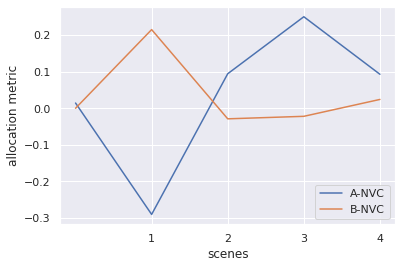

In [0]:
scenes = range(1,5)
mean_scene_a_nvc = df_allocation_trust[df_allocation_trust["NVC_A"]].groupby("scene").mean()["allocation_metric"]
mean_scene_b_nvc = df_allocation_trust[df_allocation_trust["NVC_B"]].groupby("scene").mean()["allocation_metric"]
mean_all = df_allocation_trust.groupby("scene").mean()["allocation_metric"]
diff_a = mean_scene_a_nvc.diff()
diff_b = mean_scene_b_nvc.diff()
diff_all = mean_all.diff()

# plt.plot([1,2,3,4], diff_a[1:], label="A-NVC")
# plt.plot([1,2,3,4], diff_b[1:], label="B-NVC")
plt.plot([0,1,2,3,4], mean_scene_a_nvc, label="A-NVC")
plt.plot([0,1,2,3,4], mean_scene_b_nvc, label="B-NVC")
plt.ylabel("allocation metric")
plt.xlabel("scenes")
plt.xticks([0, 1,2,3,4])
plt.legend()

# Testing hypothesis H1: Does NVC have impact on cubes allocation

In [0]:
df
t = stats.ranksums(df_nvc_a["allocation_metric"], df_nvc_b["allocation_metric"])
print(f'pval: {t.pvalue /2.0}, t-stats: {t.statistic}')

pval: 0.014362429397227532, t-stats: -2.187242048283129
